In [311]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline is akin to a Sequential class in tf where architecture of model is defined
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [312]:
data = pd.read_csv('./CaliforniaHousing/cal_housing.data', sep=',', header=None)
print(data)

X, Y = data.loc[:, 0:7].to_numpy(), data.loc[:, 8].to_numpy()
print(f"{X[:5]}\n{Y[:5]}")

            0      1     2       3       4       5       6       7         8
0     -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  452600.0
1     -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2     -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  352100.0
3     -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  341300.0
4     -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  342200.0
...       ...    ...   ...     ...     ...     ...     ...     ...       ...
20635 -121.09  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603   78100.0
20636 -121.21  39.49  18.0   697.0   150.0   356.0   114.0  2.5568   77100.0
20637 -121.22  39.43  17.0  2254.0   485.0  1007.0   433.0  1.7000   92300.0
20638 -121.32  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672   84700.0
20639 -121.24  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886   89400.0

[20640 rows x 9 columns]
[[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02 

In [313]:
X_trains, X_tests, Y_trains, Y_tests = train_test_split(X, Y, test_size=0.3, random_state=0)
print('X_trains: {} \n'.format(X_trains))
print('Y_trains: {} \n'.format(Y_trains))
print('X_tests: {} \n'.format(X_tests))
print('Y_tests: {} \n'.format(Y_tests))

X_trains: [[-119.79     36.73     52.     ...  193.       40.        1.975 ]
 [-122.21     37.77     43.     ...  836.      277.        2.2604]
 [-118.04     33.87     17.     ... 1387.      364.        6.299 ]
 ...
 [-121.9      36.58     31.     ...  704.      393.        3.1977]
 [-117.93     33.62     34.     ... 1052.      468.        5.6315]
 [-115.56     32.8      15.     ... 1024.      298.        1.3882]] 

Y_trains: [ 47500. 100000. 285800. ... 289300. 484600.  69400.] 

X_tests: [[-117.05     32.58     22.     ... 1551.      371.        4.1518]
 [-117.97     33.92     32.     ... 1296.      429.        5.7796]
 [-121.84     38.65     29.     ... 1554.      534.        4.3487]
 ...
 [-117.91     33.89     30.     ...  523.      216.        7.875 ]
 [-119.64     36.56     34.     ...  363.       97.        2.0658]
 [-121.99     37.36     32.     ...  917.      330.        4.6761]] 

Y_tests: [136900. 241300. 200700. ... 351900.  92500. 298300.] 



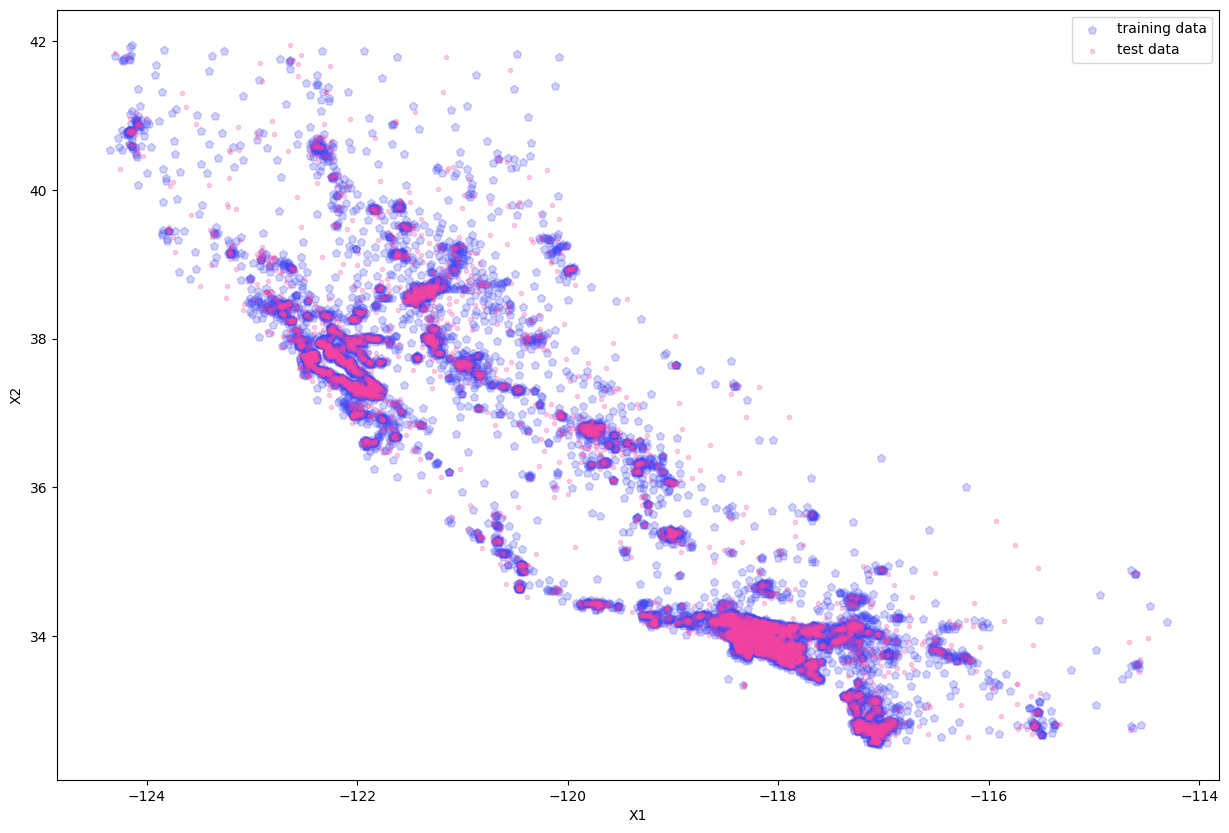

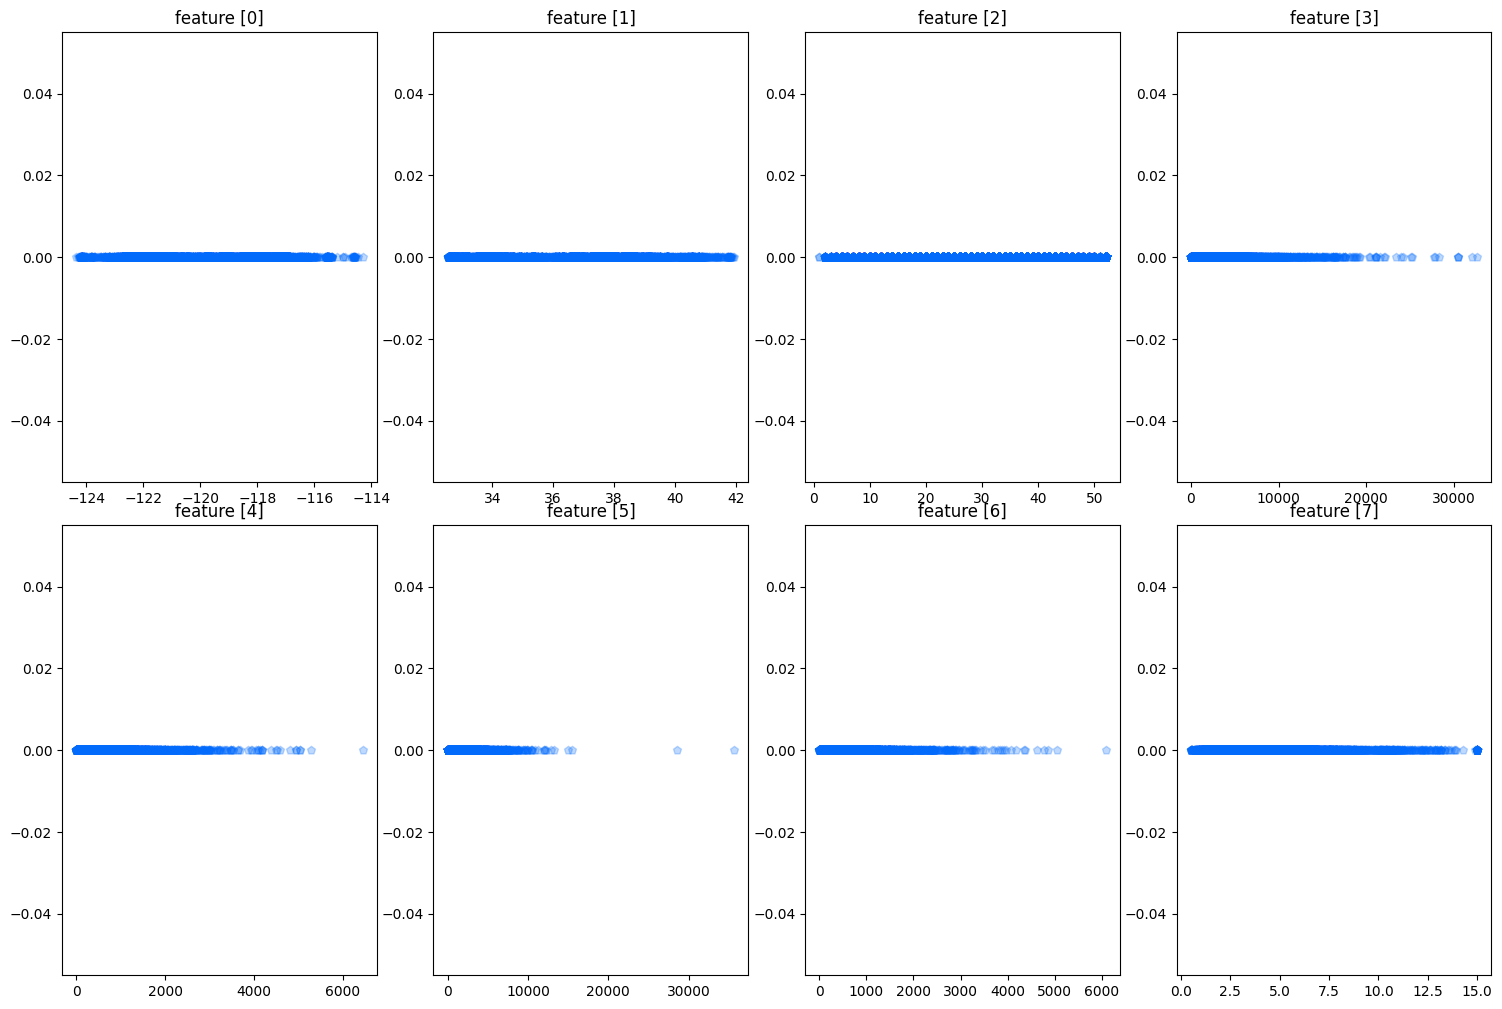

In [314]:
def plot_data(X_trains, X_tests):
    fig = plt.figure(figsize=(15, 10))
    axis = fig.add_subplot()

    axis.scatter(X_trains[:, 0], X_trains[:, 1], alpha=0.25, c='#4248f5', marker='p', label='training data')
    axis.scatter(X_tests[:, 0], X_tests[:, 1], alpha=0.25, c='#f542a1', marker='.', label='test data')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

def analyze(X_trains, X_tests, n_row_plots, m_col_plots):
    # sees the range where each feature lies
    fig, axes = plt.subplots(n_row_plots, m_col_plots, figsize=(15, 10))
    fig.tight_layout(pad=1)

    # no. of instances and features
    num_instances = X_trains.shape[0]
    num_features = X_trains.shape[1]

    # feature names
    feature_names = ["median income", "median house age", "avg no. of rooms/household", "avg no. of bedrooms/household", 
    "block group population", "avg no of household members", "block group latitude", "block group longitude"]
    
    zeros = np.zeros((num_instances,))
    
    # how do I keep the title without it being removed after plt.show()
    for feature_col_i, axis in enumerate(axes.flat):
        # print(feature_col_i)
        curr_feature = X_trains[:, feature_col_i].reshape(-1)
        # print(curr_feature)
        # print(curr_feature.shape)
        axis.scatter(curr_feature, zeros, alpha=0.25, marker='p', c='#036bfc')
        # print(feature_names[feature_col_i])
        
        # if feature_col_i % 8 == 0:
        #     axis.set_title(feature_names[feature_col_i])
        axis.set_title(f"feature [{feature_col_i}]")
        
    plt.show()

plot_data(X_trains, X_tests)
analyze(X_trains, X_tests, 2, 4)

# Linear Regression Model

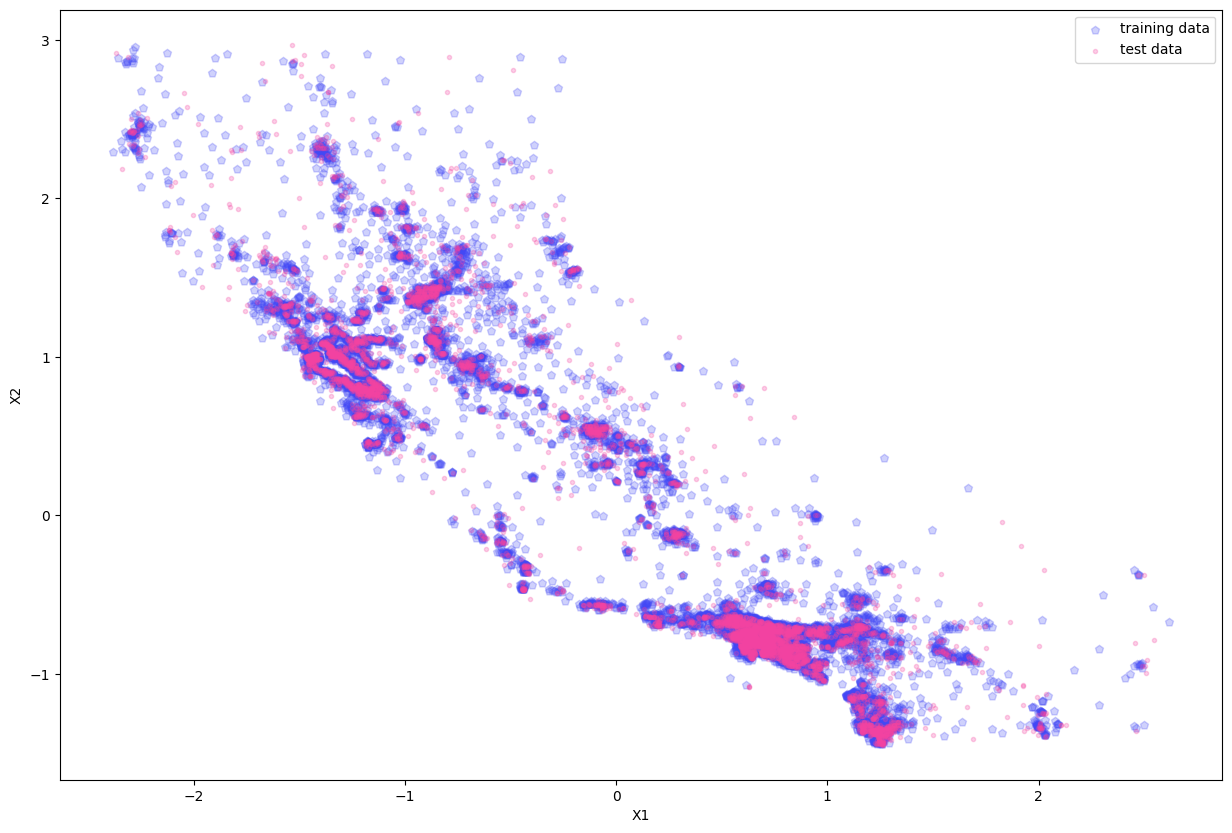

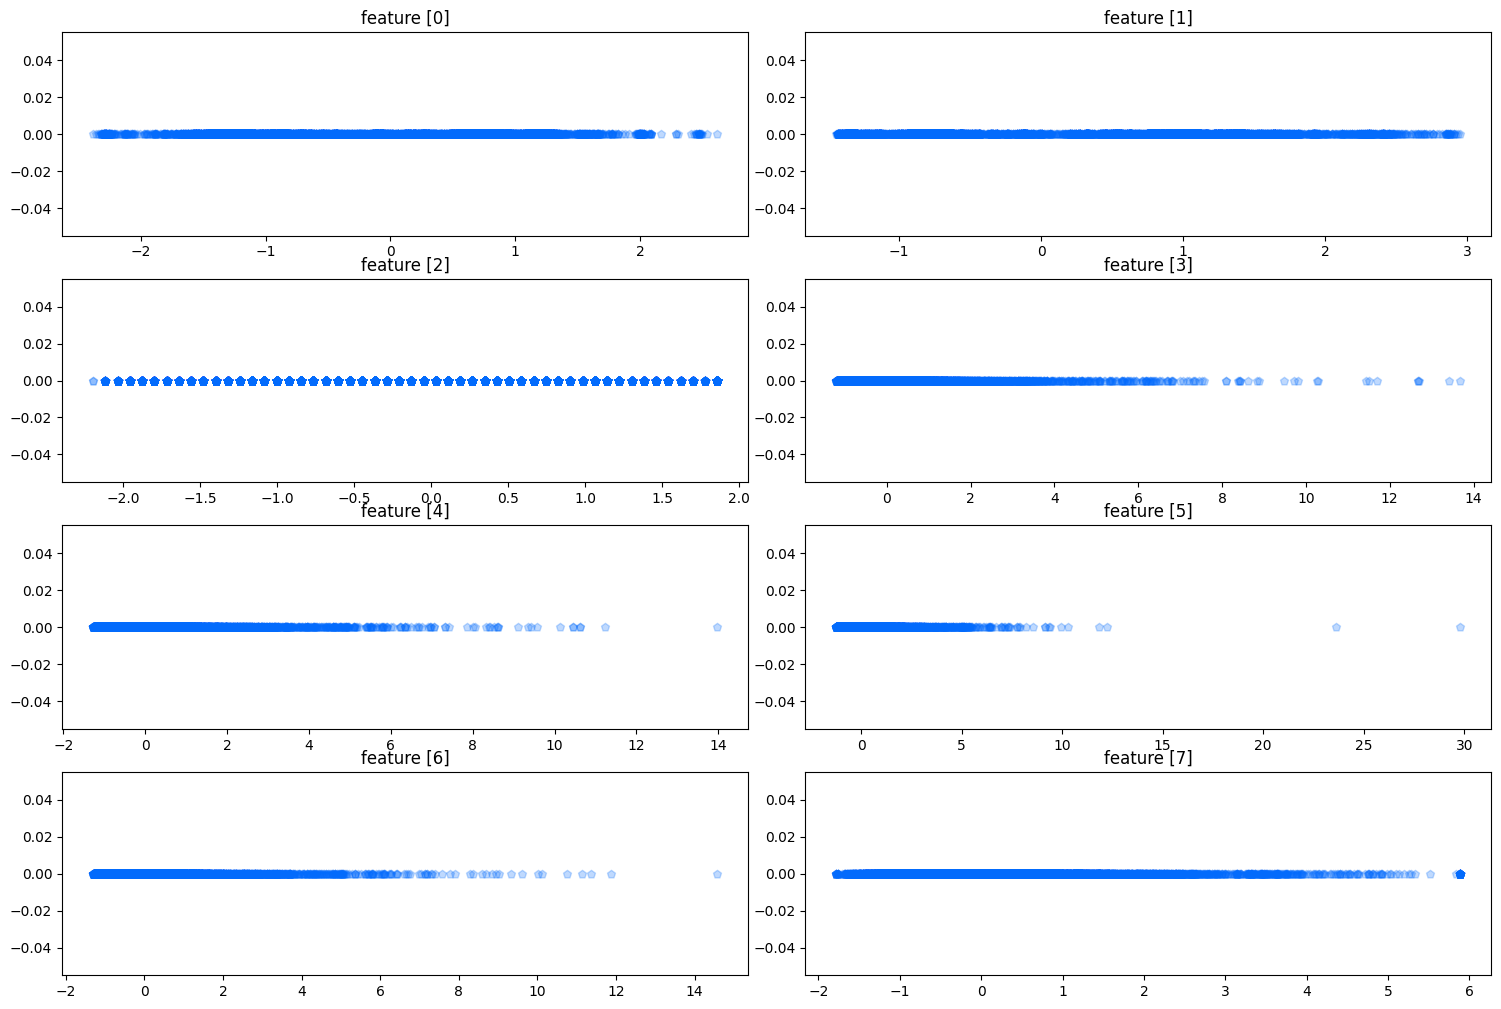

In [315]:
# standardize data or normalize both training and test data
scaler = StandardScaler()
X_trains_normed = scaler.fit_transform(X_trains)
X_tests_normed = scaler.fit_transform(X_tests)

plot_data(X_trains_normed, X_tests_normed)
analyze(X_trains_normed, X_tests_normed, 4, 2)

In [316]:


# train model
model = LinearRegression()
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 4799001920.25852
root mean squared error for training data: 69274.82890818657
mean squared error for test data: 4910336293.697278
root mean squared error for test data: 70073.79177479465


In [317]:
# train a linear regression model with L2
# regularization to see if error goes down
model = Ridge(alpha=1.0)
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 4799003404.60826
root mean squared error for training data: 69274.83962167116
mean squared error for test data: 4910391853.870234
root mean squared error for test data: 70074.18821413655


# Polynomial Regression

In [318]:
# use a function now that engineers new features out of the dataset
# such that it mimics a polynomial equation with a degree in this case of 2
# since data is parabolic
poly = PolynomialFeatures(degree=2, include_bias=False)
X_trains_enged = poly.fit_transform(X_trains)
X_tests_enged = poly.fit_transform(X_tests)

# view and see the shape of teh dataset which as observed 
# now contains 44 features
print(X_trains_enged, X_trains_enged.shape)
print(X_tests_enged, X_tests_enged.shape)

[[-1.19790000e+02  3.67300000e+01  5.20000000e+01 ...  1.60000000e+03
   7.90000000e+01  3.90062500e+00]
 [-1.22210000e+02  3.77700000e+01  4.30000000e+01 ...  7.67290000e+04
   6.26130800e+02  5.10940816e+00]
 [-1.18040000e+02  3.38700000e+01  1.70000000e+01 ...  1.32496000e+05
   2.29283600e+03  3.96774010e+01]
 ...
 [-1.21900000e+02  3.65800000e+01  3.10000000e+01 ...  1.54449000e+05
   1.25669610e+03  1.02252853e+01]
 [-1.17930000e+02  3.36200000e+01  3.40000000e+01 ...  2.19024000e+05
   2.63554200e+03  3.17137923e+01]
 [-1.15560000e+02  3.28000000e+01  1.50000000e+01 ...  8.88040000e+04
   4.13683600e+02  1.92709924e+00]] (14448, 44)
[[-1.17050000e+02  3.25800000e+01  2.20000000e+01 ...  1.37641000e+05
   1.54031780e+03  1.72374432e+01]
 [-1.17970000e+02  3.39200000e+01  3.20000000e+01 ...  1.84041000e+05
   2.47944840e+03  3.34037762e+01]
 [-1.21840000e+02  3.86500000e+01  2.90000000e+01 ...  2.85156000e+05
   2.32220580e+03  1.89111917e+01]
 ...
 [-1.17910000e+02  3.38900000e+0

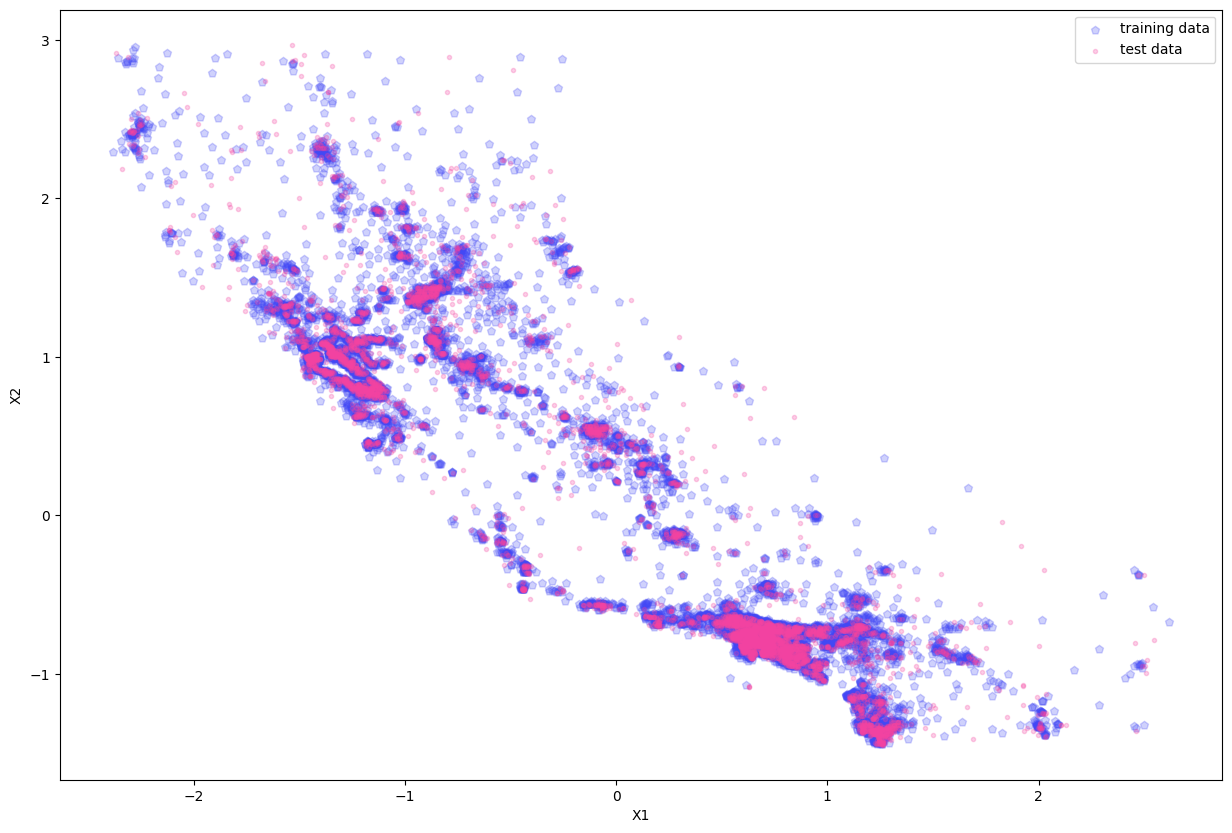

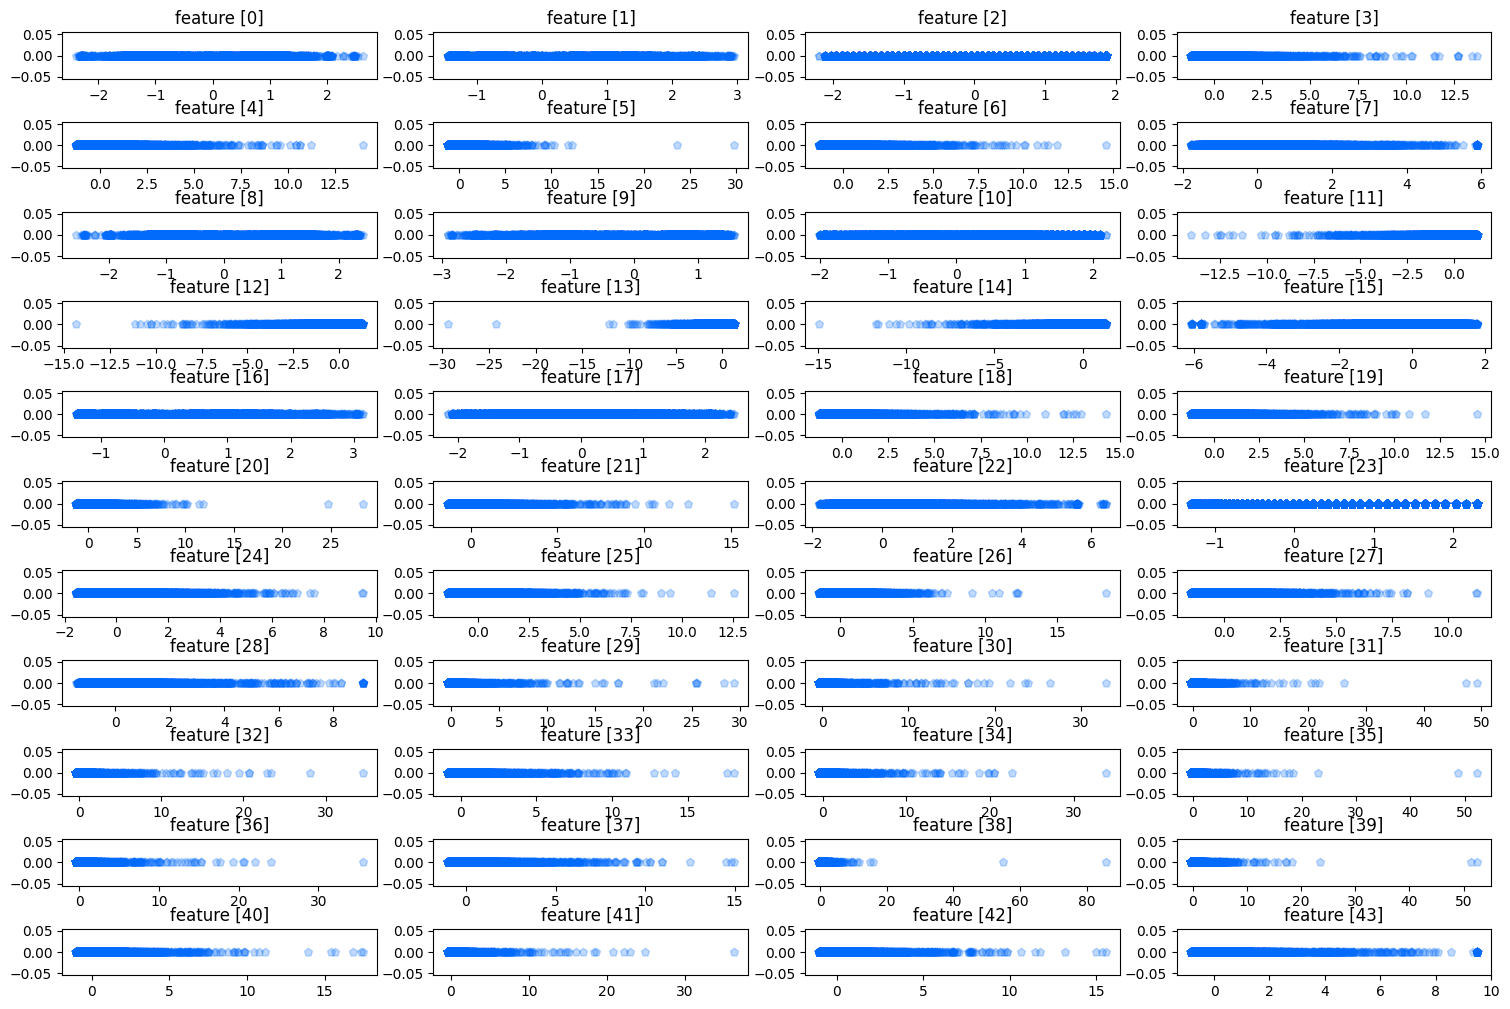

In [319]:
# standardize/normalize again the data both training and test data
scaler = StandardScaler()
X_trains_normed = scaler.fit_transform(X_trains_enged)
X_tests_normed = scaler.fit_transform(X_tests_enged)

plot_data(X_trains_normed, X_tests_normed)
analyze(X_trains_normed, X_tests_normed, 11, 4)

In [320]:
# instantiate linear regression model again
# and fit a line to the data
model = LinearRegression()
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds) / 2}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds) / 2}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 1993084981.031927
root mean squared error for training data: 63136.122482013845
mean squared error for test data: 2059341444.5528386
root mean squared error for test data: 64176.96540898204


In [321]:
# instead of instantiating PolynomialFeatures, StandardScaler, and
# LinearRegression and getting each their outputs to pass to the next class
# we can use Pipeline to reduce redundancy 

# this block of code is akin or equivalent to the aforementioned code
# that implemented a polynomial regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
model = Ridge(alpha=1.0)

poly_model = Pipeline([
    ("engineered features", poly),
    ("input normalizer|standardizer", scaler),
    ("linear regression model", model),
])

poly_model.fit(X_trains, Y_trains)



# instead of LinearRegression we use Ridge to train a linear regression 
# model with L2 regularization to see if error goes down
model = Ridge(alpha=1.0)
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 4161736504.187353
root mean squared error for training data: 64511.52225910774
mean squared error for test data: 4343455404.298108
root mean squared error for test data: 65904.8966640424


In conclusion what can be deduced from the aforementioned code is that when engineering new features or turning the data in such that it mimics a polynomial equation rather than a linear equation, the process is always first and foremost, and then comes only normalizing the newly engineered features and then training the model